# **Start Section:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Uninstall existing scikit-learn to avoid conflicts
!pip uninstall -y scikit-learn
# Install specific versions of libraries to avoid conflicts
!pip install scikit-learn==1.5.2
!pip install bayesian-optimization
!pip install optuna
!pip install gpboost
!pip install shap
!pip install ngboost
!pip install dask[dataframe]
!pip install torch seaborn
!pip install lightgbm
!pip install xgboost
!pip install lime
!pip install interpret
!pip install optunahub
!pip install cmaes
!pip install plotly kaleido
!pip install openpyxl
!pip install -U kaleido
!pip install properscoring
!pip install XlsxWriter
!pip install cython
!pip install mapie==0.6.0
!pip install pgbm
!pip install torch
!pip install cp
# !pip install mapie
!pip install torch skorch puncc
# Reinstall scikit-learn to the version required by ngboost
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.1
# Reinstall numpy first
!pip install numpy==1.26.4  # Use the version compatible with catboost
# Reinstall catboost
!pip install catboost

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 85.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=3e7b6212b4801fa589ae4be20acaec705a992dddc9cd9bfda40f4335c313fa1b
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
S

In [ ]:
# Restart the runtime to apply changes
import os
os._exit(00)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
import ngboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
from ngboost import NGBRegressor
import optuna
import optunahub
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel
from optuna.samplers import RandomSampler
import random
import time
from ngboost.distns import Normal
from ngboost.scores import LogScore
from scipy.stats import norm
from optuna.samplers import BaseSampler
from optuna.samplers import GridSampler
from optuna.samplers import TPESampler
from optuna.samplers import PartialFixedSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import QMCSampler
from optuna.samplers import NSGAIIISampler
from optuna.samplers import NSGAIISampler
from optuna.samplers import BruteForceSampler
from optuna.samplers import GPSampler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import plotly.express as px
from io import BytesIO
from openpyxl import Workbook, load_workbook
import os
import properscoring as ps
import io
from openpyxl.drawing.image import Image as openpyxlImage
import warnings
import xlsxwriter
from openpyxl.drawing.image import Image
from pgbm.sklearn import HistGradientBoostingRegressor
import torch
from pgbm.torch import PGBM
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import pickle
import json
from mapie.subsample import Subsample
from mapie.regression import MapieRegressor
from deel.puncc.metrics import regression_sharpness, regression_mean_coverage
from deel.puncc.api.prediction import BasePredictor, DualPredictor
from deel.puncc.regression import SplitCP, CVPlus, CQR
from deel.puncc.plotting import plot_prediction_intervals
from sklearn.model_selection import train_test_split
from typing_extensions import TypedDict
from typing import Union
from mapie.metrics import regression_coverage_score
from sklearn.model_selection import KFold
from PIL import Image as PImage
from openpyxl.utils.dataframe import dataframe_to_rows

In [ ]:
train_data_path = "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/train.csv"
test_data_path = "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print("Training data loaded successfully.")
print("Test data loaded successfully.")

Training data loaded successfully.
Test data loaded successfully.


In [ ]:
print("\nShape of training data:", train_data.shape)
print("First 5 rows of training data:\n", train_data.head(5))
print("\nShape of test data:", test_data.shape)
print("First 5 rows of test data:\n", test_data.head(5))


Shape of training data: (190, 152)
First 5 rows of training data:
        R1      R2      R3      R4      R5      R6      R7      R8      R9  \
0  3.5960  3.6080  3.0100  3.6130  3.3760  2.2780  1.3410  3.4570  3.3540   
1  2.9540  3.0470  3.1160  4.2640  4.4090  3.4810  2.3760  3.4030  3.4320   
2  2.4870  2.9430  2.5290  3.7280  2.9870  1.8890  1.9960  2.1020  1.6180   
3  1.3640  1.4186  1.3789  1.4776  1.5063  1.4047  1.2648  1.5166  1.5443   
4  1.3074  1.3820  1.3476  1.3986  1.3403  1.3004  1.3719  1.3984  1.3865   

      R10  ...    R143    R144    R145    R146    R147   R148    R149    R150  \
0  1.9900  ...  2.7930  1.9660  2.3070  1.5280  1.9380  3.371  2.2060  1.5220   
1  2.6350  ...  3.0260  2.3530  2.0400  1.7400  2.6250  4.026  2.9010  1.7450   
2  1.2720  ...  1.2760  1.5990  1.8610  1.0290  1.8690  3.905  2.3200  1.3310   
3  1.3834  ...  1.2223  1.0919  1.0995  1.0856  1.1728  1.315  1.2341  1.0753   
4  1.3964  ...  1.1691  1.0689  1.1230  1.1384  1.1810  1.235  1

In [ ]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
x_test= X_test
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (190, 151)
Shape of y_train: (190,)
Shape of X_test: (82, 151)
Shape of y_test: (82,)


In [ ]:
# Apply z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first five rows of the normalized data
print("\nFirst five rows of normalized X_train:")
print(X_train[:5])

print("\nFirst five rows of normalized X_test:")
print(X_test[:5])


First five rows of normalized X_train:
[[ 1.22103295  1.13089815  0.61081314  0.73682842  0.54673262 -0.0261968
  -0.51531151  0.70303503  0.5510272  -0.2441054   0.17648144  0.69219002
   0.9485328   0.82481901  0.34566436 -0.40609522 -0.463771    0.43872889
   0.89421381  1.05057715  1.04529849  1.03900179  0.42575888  0.173456
   0.45642529  0.83037026  0.89010153  0.77972274  0.71866378  0.6206252
   0.82167079  0.97412629  0.67298061  0.39758814  0.52679374  0.94375937
   0.74197071  0.86577935  1.27064247  1.51437415  0.46596778 -0.30888056
  -0.12461695  0.49591603  0.72957494  0.5811918   0.31848773  0.53466849
   0.20246884  0.11900459  0.99635035  0.72105768  0.43065398  0.36777539
   0.10638109 -0.0263905   0.2318847   0.82337505  0.74363607  0.85248236
   0.71669043 -0.11909161 -0.10843386  0.51688952  0.84551287 -0.1576873
  -0.12716017  0.37884167  0.35396679 -0.24556803  0.07962918  0.82628894
   0.54494889  1.02963853  1.17379609  0.60350175 -0.17692428 -0.31350223
   

# **Functions:**

In [ ]:
feature_names = [f'R{i}' for i in range(1, 152)]

In [ ]:
def get_best_model_params(results, model_name):
    # Map model names to dictionary keys, assuming keys are strings like 'XGBoost' and not objects
    model_keys = {
        'LightGBM': 'LightGBM',
        'XGBoost': 'XGBoost',
        'GPBoost': 'GPBoost',
        'GBM': 'Gradient Boosting',
        'CatBoost': 'CatBoost',
        'NGBoost': 'NGBoost',
        'HGBR' : 'HistGradientBoosting',
        'PGBM' : 'PGBM'
    }

    # Ensure the requested model name is valid
    if model_name not in model_keys:
        raise ValueError(f"Model name '{model_name}' is not recognized. Available models are: {list(model_keys.keys())}")

    # Filter out entries for the specified model
    model_entries = {key: value for key, value in results.items() if key[0] == model_keys[model_name]}

    # Find the entry with the best (lowest) 'best_score'
    best_entry_key, best_entry_value = min(model_entries.items(), key=lambda item: item[1]['best_score'])

    # Return the best hyperparameters
    return best_entry_value['best_params']

In [ ]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test.to_numpy()[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test.to_numpy()[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.to_numpy().ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

def conformal_predictions_MAPIE(model_class, best_params, X_train, y_train, X_test, y_test, model_name, excel_file_path):
    """
    Train and plot conformal prediction intervals using different strategies and save the plots and
    table of ymin/ymax/y_pred to different worksheets in an Excel file for each strategy.

    Parameters:
    - model_class: The class of the model to be used (e.g., LGBMRegressor).
    - best_params: Dictionary of best parameters for the model.
    - X_train: Training features.
    - y_train: Training target.
    - X_test: Test features.
    - y_test: Test target.
    - model_name: Name of the model for labeling purposes.
    - excel_file_path: Path to the Excel file where the plots will be saved.
    """
    # Set random seed for reproducibility
    SEED: int = 123
    np.random.seed(SEED)

    # Define miscoverage
    MISCOVERAGE: float = 0.1  # MISCOVERAGE = alpha # CONFIDENCE = 1-alpha
    warnings.filterwarnings("ignore")  # to suppress them

    # Create output directory
    os.makedirs('output/regression', exist_ok=True)

    # Define strategies and parameters
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Define base estimators
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    # Train strategies using MAPIE
    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set

    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred) # Corrected line: Removed y_test
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test.to_numpy() - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the results for the test set
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names) * 3 + 1 + len(_strategies) # Strategy plots + Goodness plots + Width plots + Comparison plot + Coverage vs Width plots
    fig, axs = plt.subplots(nrows=n_figs, figsize=(10, 5 * n_figs))

    plot_index = 0 # Keep track of the current plot index

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up, color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red', label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('WQI')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Combined plot for comparison
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up, alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name], label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('WQI')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1

    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted WQI')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1

    plt.tight_layout()

    # Save plots and tabular data to Excel
    with io.BytesIO() as buf:
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet for the plots
        workbook = load_workbook(excel_file_path)
        plot_sheet_name = 'conformal_predictions_MAPIE'
        if plot_sheet_name in workbook.sheetnames:
            plot_sheet_name += '_new'
        plot_worksheet = workbook.create_sheet(title=plot_sheet_name)
        plot_worksheet.add_image(img, 'A1')

        all_rows = []
        y_true_np = y_test.to_numpy().ravel()  # To save multiple conversions
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = (y_true_np >= ymin_np) & (y_true_np <= ymax_np)
            residual_np = y_true_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_true_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np.astype(int),
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet.cell(row=i+2, column=j, value=value)

        # Save the workbook
        workbook.save(excel_file_path)

    plt.close()

In [ ]:
def conformal_predictions_PUNCC(
    X_train, y_train, X_test, y_test, best_scores_autosampler, model_class,
    excel_file_path=None, model_params=None, alpha=0.1
):
    # Determine the default parameters for the model, or use provided ones
    if model_params is None:
        if model_class.__name__ == 'LGBMRegressor':
            model_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
        else:
            model_params = {}

    # Initialize and train the model using the provided class and parameters
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    model.fit(X_train, y_train)

    def evaluate_cp(X_test, y_test, model_cp, alpha):
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test, alpha=alpha)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)
        return sharpness, coverage

    # Wrap the model in a BasePredictor
    base_predictor = BasePredictor(model, is_trained=True)

    # Initialize and fit the SplitCP conformal predictor
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train, fit_ratio=0.5)

    # Compute prediction intervals and metrics on the test set using SplitCP
    y_pred_splitcp, y_pred_lower_splitcp, y_pred_upper_splitcp = splitcp.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, splitcp, alpha)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"SplitCP - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for SplitCP
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    axs[0].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[0].fill_between(np.arange(len(y_test)), y_pred_lower_splitcp, y_pred_upper_splitcp, color='gray', alpha=0.5, label='Prediction interval')
    axs[0].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[0].set_title('Split Conformal Prediction')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('WQI')
    axs[0].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Initialize and fit the CVPlus conformal predictor
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train)

    # Compute prediction intervals and metrics on the test set using CVPlus
    y_pred_cvplus, y_pred_lower_cvplus, y_pred_upper_cvplus = cvplus.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, cvplus, alpha)
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CVPlus - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CVPlus
    axs[1].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[1].fill_between(np.arange(len(y_test)), y_pred_lower_cvplus, y_pred_upper_cvplus, color='gray', alpha=0.5, label='Prediction interval')
    axs[1].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[1].set_title('Cross Validation Plus')
    axs[1].set_xlabel('Sample Number ')
    axs[1].set_ylabel('WQI')
    axs[1].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Split the training data into proper training (fit) set and calibration set
    X_fit, X_calib, y_fit, y_calib = train_test_split(
        X_train, y_train, test_size=0.5, random_state=0
    )

    # Fit the upper and lower quantile models
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)

    _ = upper_quantile_model.fit(X_fit, y_fit)
    _ = lower_quantile_model.fit(X_fit, y_fit)

    # Wrap the upper and lower quantile models in a dual predictor
    dualpredictor = DualPredictor(
        [lower_quantile_model, upper_quantile_model], is_trained=[True, True]
    )

    # Initialize the CQR conformal predictor
    cqr = CQR(
        dualpredictor, train=False
    )  # train=False to use the pre-trained dual predictor

    # Compute nonconformity scores on the calibration set
    cqr.fit(X_calib=X_calib, y_calib=y_calib)

    # Compute prediction intervals and metrics on the test set
    y_pred_cqr, y_pred_lower_cqr, y_pred_upper_cqr = cqr.predict(X_test, alpha=alpha)
    y_pred_cqr = 0.5 * (y_pred_lower_cqr + y_pred_upper_cqr)
    sharpness, coverage = evaluate_cp(X_test, y_test, cqr, alpha)

    print(f"CQR - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CQR - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CQR
    axs[2].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[2].fill_between(np.arange(len(y_test)), y_pred_lower_cqr, y_pred_upper_cqr, color='gray', alpha=0.5, label='Prediction interval')
    axs[2].plot(np.arange(len(y_test)), y_pred_cqr, color='red', label='Predicted mean', linewidth=1)
    axs[2].set_title('Conformalized Quantile Regression')
    axs[2].set_xlabel('Sample Number')
    axs[2].set_ylabel('WQI')
    axs[2].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'SplitCP_lower': np.asarray(y_pred_lower_splitcp).reshape(-1),
        'SplitCP_upper': np.asarray(y_pred_upper_splitcp).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'CVPlus_lower': np.asarray(y_pred_lower_cvplus).reshape(-1),
        'CVPlus_upper': np.asarray(y_pred_upper_cvplus).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_pred_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_pred_upper_cqr).reshape(-1),
    }

    # Save all plots and values to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

In [ ]:
def prediction_MAPIE_analysis(
    X_train,
    y_train,
    X_test,
    y_test,
    model_cls,
    model_params,
    excel_file_path=None,
    suptitle: str = "Prediction Intervals"
) -> None:
    # Initialize and fit the model with MAPIE using provided parameters
    mdl = model_cls(**model_params)
    mapie = MapieRegressor(mdl, method="plus", cv=KFold(n_splits=5, shuffle=True))
    mapie.fit(X_train, y_train)

    alpha = np.arange(0.05, 1, 0.05)
    y_train_pred, y_train_pis = mapie.predict(X_train, alpha=alpha)
    y_test_pred, y_test_pis = mapie.predict(X_test, alpha=alpha)

    # Visualization function
    def plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pred_low,
        y_train_pred_high,
        y_test,
        y_test_pred,
        y_test_pred_low,
        y_test_pred_high,
        suptitle: str,
    ) -> None:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

        ax1.errorbar(
            x=y_train,
            y=y_train_pred,
            yerr=(np.abs(y_train_pred - y_train_pred_low), np.abs(y_train_pred_high - y_train_pred)),
            alpha=0.8,
            label="train",
            fmt=".",
        )
        ax1.errorbar(
            x=y_test,
            y=y_test_pred,
            yerr=(np.abs(y_test_pred - y_test_pred_low), np.abs(y_test_pred_high - y_test_pred)),
            alpha=0.8,
            label="test",
            fmt=".",
        )
        ax1.plot(
            [y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            color="gray",
            alpha=0.5,
        )
        ax1.set_xlabel("Actual WQI", fontsize=12)
        ax1.set_ylabel("Predicted WQI", fontsize=12)
        ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

        ax2.scatter(
            x=y_train, y=y_train_pred_high - y_train_pred_low, alpha=0.8, label="train", marker="."
        )
        ax2.scatter(x=y_test, y=y_test_pred_high - y_test_pred_low, alpha=0.8, label="test", marker=".")
        ax2.set_xlabel("Actual WQI", fontsize=12)
        ax2.set_ylabel("Interval width", fontsize=12)
        ax2.set_xscale("linear")
        ax2.set_ylim([0, np.max(y_test_pred_high - y_test_pred_low)*1.1])
        ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        std_all = np.concatenate([
            y_train_pred_high - y_train_pred_low, y_test_pred_high - y_test_pred_low
        ])
        type_all = np.array(["train"] * len(y_train) + ["test"] * len(y_test))
        x_all = np.arange(len(std_all))
        order_all = np.argsort(std_all)
        std_order = std_all[order_all]
        type_order = type_all[order_all]
        ax3.scatter(
            x=x_all[type_order == "train"],
            y=std_order[type_order == "train"],
            alpha=0.8,
            label="train",
            marker=".",
        )
        ax3.scatter(
            x=x_all[type_order == "test"],
            y=std_order[type_order == "test"],
            alpha=0.8,
            label="test",
            marker=".",
        )
        ax3.set_xlabel("Order", fontsize=12)
        ax3.set_ylabel("Interval width", fontsize=12)
        ax3.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        ax1.set_title("Actual vs Predicted WQI")
        ax2.set_title("Prediction interval width vs Actual WQI")
        ax3.set_title("Ordered prediction interval width")
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.suptitle(suptitle, size=20)

        # Save plot to Excel
        if excel_file_path:
            save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_1')

        plt.close(fig)

    alpha_plot = int(np.where(alpha == 0.1)[0])
    plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pis[:, 0, alpha_plot],
        y_train_pis[:, 1, alpha_plot],
        y_test,
        y_test_pred,
        y_test_pis[:, 0, alpha_plot],
        y_test_pis[:, 1, alpha_plot],
        suptitle,
    )

    # Comparison of the uncertainty quantification methods
    Params = TypedDict("Params", {"method": str, "cv": Union[int, Subsample]})
    STRATEGIES = {
        "naive": Params(method="naive"),
        "cv": Params(method="base", cv=5),
        "cv_plus": Params(method="plus", cv=5),
        "cv_minmax": Params(method="minmax", cv=5),
        "jackknife_plus_ab": Params(method="plus", cv=Subsample(n_resamplings=20)),
    }
    y_pred, y_pis, scores = {}, {}, {}
    for strategy, params in STRATEGIES.items():
        mapie = MapieRegressor(mdl, **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha)
        scores[strategy] = [
            regression_coverage_score(y_test, y_pis[strategy][:, 0, i], y_pis[strategy][:, 1, i])
            for i, _ in enumerate(alpha)
        ]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("Target coverage (1 - alpha)")
    ax.set_ylabel("Effective coverage")
    for strategy, params in STRATEGIES.items():
        ax.plot(1 - alpha, scores[strategy], label=strategy)
    plt.subplots_adjust(right=0.75)
    ax.plot([0, 1], [0, 1], ls="--", color="k")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0.)

    # Save plot to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_2')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

# **Hyperparameter Tuning using Autosampler Optuna**

In [ ]:
best_scores_autosampler ={('Random Forest', 'MedianPruner'): {'best_score': 926.9746881386717,
  'best_params': {'n_estimators': 700,
   'criterion': 'squared_error',
   'max_depth': 20,
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.5,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 926.9746881386717,
  'test_rmse': 30.446259017138242,
  'test_corr_coef': 0.9380539187700511,
  'pruner': 'MedianPruner'},
 ('Random Forest', 'NopPruner'): {'best_score': 937.9560207935197,
  'best_params': {'n_estimators': 700,
   'criterion': 'squared_error',
   'max_depth': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 937.9560207935197,
  'test_rmse': 30.62606766781396,
  'test_corr_coef': 0.9338201932833533,
  'pruner': 'NopPruner'},
 ('Random Forest', 'PatientPruner'): {'best_score': 928.3935142510413,
  'best_params': {'n_estimators': 300,
   'criterion': 'squared_error',
   'max_depth': 30,
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 928.3935142510413,
  'test_rmse': 30.469550607960095,
  'test_corr_coef': 0.9318269362838447,
  'pruner': 'PatientPruner'},
 ('Random Forest', 'PercentilePruner'): {'best_score': 936.3276968392234,
  'best_params': {'n_estimators': 700,
   'criterion': 'friedman_mse',
   'max_depth': 30,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 936.3276968392234,
  'test_rmse': 30.599472166023116,
  'test_corr_coef': 0.9443155093176682,
  'pruner': 'PercentilePruner'},
 ('Random Forest',
  'SuccessiveHalvingPruner'): {'best_score': 922.9224466496914, 'best_params': {'n_estimators': 300,
   'criterion': 'friedman_mse',
   'max_depth': None,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01}, 'test_mse': 922.9224466496914, 'test_rmse': 30.379638685305185, 'test_corr_coef': 0.9344935993588843, 'pruner': 'SuccessiveHalvingPruner'},
 ('Random Forest', 'HyperbandPruner'): {'best_score': 928.6979037649045,
  'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': 30,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.1},
  'test_mse': 928.6979037649045,
  'test_rmse': 30.474545177326345,
  'test_corr_coef': 0.9305524100852461,
  'pruner': 'HyperbandPruner'},
 ('Random Forest', 'ThresholdPruner'): {'best_score': 929.8587794201471,
  'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': 100,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 929.8587794201471,
  'test_rmse': 30.49358587342832,
  'test_corr_coef': 0.930542178541985,
  'pruner': 'ThresholdPruner'},
 ('Random Forest', 'WilcoxonPruner'): {'best_score': 928.8038145612356,
  'best_params': {'n_estimators': 300,
   'criterion': 'friedman_mse',
   'max_depth': 10,
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.3,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 928.8038145612356,
  'test_rmse': 30.476282820600606,
  'test_corr_coef': 0.931846820097067,
  'pruner': 'WilcoxonPruner'},
 ('Gradient Boosting', 'MedianPruner'): {'best_score': 826.8450802541028,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.2,
   'n_estimators': 100,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.1,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.0001,
   'ccp_alpha': 0.0},
  'test_mse': 826.8450802541028,
  'test_rmse': 28.754914019243785,
  'test_corr_coef': 0.9279449171502246,
  'pruner': 'MedianPruner'},
 ('Gradient Boosting', 'NopPruner'): {'best_score': 781.7895087976207,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 700,
   'subsample': 0.7,
   'criterion': 'squared_error',
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.0001,
   'ccp_alpha': 0.001},
  'test_mse': 781.7895087976207,
  'test_rmse': 27.96049907990951,
  'test_corr_coef': 0.9341384925660862,
  'pruner': 'NopPruner'},
 ('Gradient Boosting', 'PatientPruner'): {'best_score': 668.5962917226813,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 700,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 3,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.001,
   'ccp_alpha': 0.01},
  'test_mse': 668.5962917226813,
  'test_rmse': 25.857229003175906,
  'test_corr_coef': 0.9420302992631479,
  'pruner': 'PatientPruner'},
 ('Gradient Boosting', 'PercentilePruner'): {'best_score': 696.7060074905164,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.2,
   'n_estimators': 500,
   'subsample': 0.5,
   'criterion': 'friedman_mse',
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 3,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 696.7060074905164,
  'test_rmse': 26.395189097457067,
  'test_corr_coef': 0.946479542303648,
  'pruner': 'PercentilePruner'},
 ('Gradient Boosting',
  'SuccessiveHalvingPruner'): {'best_score': 771.7055331834227, 'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 300,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.001}, 'test_mse': 771.7055331834227, 'test_rmse': 27.779588427178375, 'test_corr_coef': 0.9441148112370387, 'pruner': 'SuccessiveHalvingPruner'},
 ('Gradient Boosting', 'HyperbandPruner'): {'best_score': 702.5066063040902,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 500,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 50,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.0001,
   'ccp_alpha': 0.01},
  'test_mse': 702.5066063040902,
  'test_rmse': 26.504841186169937,
  'test_corr_coef': 0.9410771823195679,
  'pruner': 'HyperbandPruner'},
 ('Gradient Boosting', 'ThresholdPruner'): {'best_score': 716.4136543206561,
  'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.2,
   'n_estimators': 200,
   'subsample': 0.7,
   'criterion': 'friedman_mse',
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 5,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.01},
  'test_mse': 716.4136543206561,
  'test_rmse': 26.765904698340687,
  'test_corr_coef': 0.9402314074316714,
  'pruner': 'ThresholdPruner'},
 ('Gradient Boosting', 'WilcoxonPruner'): {'best_score': 727.7486334239142,
  'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.1,
   'n_estimators': 500,
   'subsample': 1.0,
   'criterion': 'friedman_mse',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 5,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.0001,
   'ccp_alpha': 0.001},
  'test_mse': 727.7486334239142,
  'test_rmse': 26.976816591731392,
  'test_corr_coef': 0.9360999910400127,
  'pruner': 'WilcoxonPruner'},
 ('XGBoost', 'MedianPruner'): {'best_score': 690.8297729492188,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.1,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0.5,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'colsample_bylevel': 0.7,
   'reg_alpha': 1,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 690.8297729492188,
  'test_rmse': 26.283640785652562,
  'test_corr_coef': 0.9457246603165833,
  'pruner': 'MedianPruner'},
 ('XGBoost', 'NopPruner'): {'best_score': 686.6576538085938,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.1,
   'max_depth': 5,
   'min_child_weight': 1,
   'gamma': 0.5,
   'subsample': 0.7,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 686.6576538085938,
  'test_rmse': 26.204153369429697,
  'test_corr_coef': 0.9497348647658967,
  'pruner': 'NopPruner'},
 ('XGBoost', 'PatientPruner'): {'best_score': 622.8858642578125,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.1,
   'max_depth': 3,
   'min_child_weight': 3,
   'gamma': 0.5,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.9,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 622.8858642578125,
  'test_rmse': 24.957681467993226,
  'test_corr_coef': 0.9526383255315664,
  'pruner': 'PatientPruner'},
 ('XGBoost', 'PercentilePruner'): {'best_score': 605.669677734375,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 7,
   'min_child_weight': 3,
   'gamma': 0.1,
   'subsample': 0.6,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 605.669677734375,
  'test_rmse': 24.61035712325961,
  'test_corr_coef': 0.9508572219911771,
  'pruner': 'PercentilePruner'},
 ('XGBoost', 'SuccessiveHalvingPruner'): {'best_score': 654.443603515625,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 3,
   'min_child_weight': 5,
   'gamma': 0.5,
   'subsample': 0.7,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 654.443603515625,
  'test_rmse': 25.58209536991888,
  'test_corr_coef': 0.9481971540163014,
  'pruner': 'SuccessiveHalvingPruner'},
 ('XGBoost', 'HyperbandPruner'): {'best_score': 664.0693359375,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.15,
   'max_depth': 5,
   'min_child_weight': 3,
   'gamma': 0.5,
   'subsample': 0.9,
   'colsample_bytree': 0.5,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 664.0693359375,
  'test_rmse': 25.769542796438976,
  'test_corr_coef': 0.9473404883534584,
  'pruner': 'HyperbandPruner'},
 ('XGBoost', 'ThresholdPruner'): {'best_score': 687.9976806640625,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 3,
   'gamma': 1,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 687.9976806640625,
  'test_rmse': 26.229709885243917,
  'test_corr_coef': 0.9493622590036852,
  'pruner': 'ThresholdPruner'},
 ('XGBoost', 'WilcoxonPruner'): {'best_score': 690.7450561523438,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 7,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 690.7450561523438,
  'test_rmse': 26.28202914830481,
  'test_corr_coef': 0.9434444285701333,
  'pruner': 'WilcoxonPruner'},
 ('LightGBM', 'MedianPruner'): {'best_score': 687.6213685241634,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'min_child_weight': 0.01,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 687.6213685241634,
  'test_rmse': 26.22253550906478,
  'test_corr_coef': 0.9486948872823441,
  'pruner': 'MedianPruner'},
 ('LightGBM', 'NopPruner'): {'best_score': 748.6190203392741,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.1,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 5,
   'subsample': 0.8,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 10,
   'min_child_weight': 0.001,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 748.6190203392741,
  'test_rmse': 27.360903134569117,
  'test_corr_coef': 0.9450914571670231,
  'pruner': 'NopPruner'},
 ('LightGBM', 'PatientPruner'): {'best_score': 707.208125570096,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.1,
   'num_leaves': 15,
   'max_depth': -1,
   'min_child_samples': 10,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.1,
   'reg_lambda': 10,
   'min_child_weight': 1e-05,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 707.208125570096,
  'test_rmse': 26.59338499646286,
  'test_corr_coef': 0.9407200289406664,
  'pruner': 'PatientPruner'},
 ('LightGBM', 'PercentilePruner'): {'best_score': 766.6062716200108,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.05,
   'num_leaves': 63,
   'max_depth': 5,
   'min_child_samples': 20,
   'subsample': 0.8,
   'colsample_bytree': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1,
   'min_child_weight': 0.001,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 766.6062716200108,
  'test_rmse': 27.687655581865556,
  'test_corr_coef': 0.9345182922130101,
  'pruner': 'PercentilePruner'},
 ('LightGBM', 'SuccessiveHalvingPruner'): {'best_score': 587.9233862763272,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.1,
   'num_leaves': 15,
   'max_depth': 5,
   'min_child_samples': 5,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'min_child_weight': 0.001,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 587.9233862763272,
  'test_rmse': 24.247131506145777,
  'test_corr_coef': 0.9577393597234097,
  'pruner': 'SuccessiveHalvingPruner'},
 ('LightGBM', 'HyperbandPruner'): {'best_score': 598.7971005905614,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.15,
   'num_leaves': 31,
   'max_depth': 5,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.01,
   'reg_lambda': 1,
   'min_child_weight': 0.001,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 598.7971005905614,
  'test_rmse': 24.470331027400537,
  'test_corr_coef': 0.9562046162750685,
  'pruner': 'HyperbandPruner'},
 ('LightGBM', 'ThresholdPruner'): {'best_score': 673.6967643304616,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.1,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 1.0,
   'reg_alpha': 0,
   'reg_lambda': 10,
   'min_child_weight': 1e-05,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 673.6967643304616,
  'test_rmse': 25.95566921368936,
  'test_corr_coef': 0.9502168225063722,
  'pruner': 'ThresholdPruner'},
 ('LightGBM', 'WilcoxonPruner'): {'best_score': 727.0376394439177,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'num_leaves': 63,
   'max_depth': 7,
   'min_child_samples': 20,
   'subsample': 1.0,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1,
   'min_child_weight': 0.01,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 727.0376394439177,
  'test_rmse': 26.96363550124348,
  'test_corr_coef': 0.9387415382908113,
  'pruner': 'WilcoxonPruner'},
 ('GPBoost', 'MedianPruner'): {'best_score': 705.2209234493985,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.6,
   'colsample_bytree': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 0.5,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 705.2209234493985,
  'test_rmse': 26.555995998067903,
  'test_corr_coef': 0.9409981493259966,
  'pruner': 'MedianPruner'},
 ('GPBoost', 'NopPruner'): {'best_score': 701.3000437709593,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.7,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.1,
   'reg_lambda': 0.5,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 701.3000437709593,
  'test_rmse': 26.48207023196939,
  'test_corr_coef': 0.9415580579884352,
  'pruner': 'NopPruner'},
 ('GPBoost', 'PatientPruner'): {'best_score': 758.8116327218879,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 7,
   'num_leaves': 63,
   'min_child_samples': 20,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'reg_alpha': 1.0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 758.8116327218879,
  'test_rmse': 27.546535766260845,
  'test_corr_coef': 0.935366184889031,
  'pruner': 'PatientPruner'},
 ('GPBoost', 'PercentilePruner'): {'best_score': 749.6043356730718,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.05,
   'max_depth': 5,
   'num_leaves': 63,
   'min_child_samples': 20,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'reg_alpha': 1.0,
   'reg_lambda': 0,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 749.6043356730718,
  'test_rmse': 27.378903113037087,
  'test_corr_coef': 0.9369245701596264,
  'pruner': 'PercentilePruner'},
 ('GPBoost', 'SuccessiveHalvingPruner'): {'best_score': 715.7122947830827,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 63,
   'min_child_samples': 20,
   'subsample': 0.6,
   'colsample_bytree': 0.7,
   'reg_alpha': 1.0,
   'reg_lambda': 0.5,
   'min_child_weight': 1e-05,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 715.7122947830827,
  'test_rmse': 26.752799755971015,
  'test_corr_coef': 0.9406035271489431,
  'pruner': 'SuccessiveHalvingPruner'},
 ('GPBoost', 'HyperbandPruner'): {'best_score': 729.821365222223,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': -1,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.6,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.5,
   'reg_lambda': 0.1,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 729.821365222223,
  'test_rmse': 27.01520618507701,
  'test_corr_coef': 0.9371427391264351,
  'pruner': 'HyperbandPruner'},
 ('GPBoost', 'ThresholdPruner'): {'best_score': 713.8617694748239,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.8,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 1.0,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 713.8617694748239,
  'test_rmse': 26.71819173287788,
  'test_corr_coef': 0.9389779348832684,
  'pruner': 'ThresholdPruner'},
 ('GPBoost', 'WilcoxonPruner'): {'best_score': 698.1615125042936,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 63,
   'min_child_samples': 20,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.1,
   'reg_lambda': 0.5,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 698.1615125042936,
  'test_rmse': 26.422746119665412,
  'test_corr_coef': 0.9417902712966542,
  'pruner': 'WilcoxonPruner'},
 ('CatBoost', 'MedianPruner'): {'best_score': 624.6051161335615,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 1,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 624.6051161335615,
  'test_rmse': 24.992101074810847,
  'test_corr_coef': 0.9533092119864104,
  'pruner': 'MedianPruner'},
 ('CatBoost', 'NopPruner'): {'best_score': 692.5096873387843,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 10,
   'rsm': 0.8,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 692.5096873387843,
  'test_rmse': 26.315578795435684,
  'test_corr_coef': 0.9481648081163799,
  'pruner': 'NopPruner'},
 ('CatBoost', 'PatientPruner'): {'best_score': 615.3808191312761,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.1,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 5,
   'rsm': 0.8,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 615.3808191312761,
  'test_rmse': 24.80687040179144,
  'test_corr_coef': 0.9520973423458917,
  'pruner': 'PatientPruner'},
 ('CatBoost', 'PercentilePruner'): {'best_score': 630.5890782836616,
  'best_params': {'iterations': 500,
   'learning_rate': 0.1,
   'depth': 6,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 5,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 630.5890782836616,
  'test_rmse': 25.111532774477578,
  'test_corr_coef': 0.9489559729651481,
  'pruner': 'PercentilePruner'},
 ('CatBoost', 'SuccessiveHalvingPruner'): {'best_score': 607.1987681378401,
  'best_params': {'iterations': 500,
   'learning_rate': 0.05,
   'depth': 6,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 0.6,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 607.1987681378401,
  'test_rmse': 24.64140353425186,
  'test_corr_coef': 0.9532324332878932,
  'pruner': 'SuccessiveHalvingPruner'},
 ('CatBoost', 'HyperbandPruner'): {'best_score': 630.5890782836616,
  'best_params': {'iterations': 500,
   'learning_rate': 0.1,
   'depth': 6,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 10,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 630.5890782836616,
  'test_rmse': 25.111532774477578,
  'test_corr_coef': 0.9489559729651481,
  'pruner': 'HyperbandPruner'},
 ('CatBoost', 'ThresholdPruner'): {'best_score': 630.5453803317046,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.1,
   'depth': 6,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 5,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 630.5453803317046,
  'test_rmse': 25.11066268205012,
  'test_corr_coef': 0.9489600108379744,
  'pruner': 'ThresholdPruner'},
 ('CatBoost', 'WilcoxonPruner'): {'best_score': 643.9058681801139,
  'best_params': {'iterations': 500,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 10,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 643.9058681801139,
  'test_rmse': 25.37530035645123,
  'test_corr_coef': 0.9524961757264667,
  'pruner': 'WilcoxonPruner'},
 ('NGBoost', 'MedianPruner'): {'best_score': 764.4986435785781,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 764.4986435785781,
  'test_rmse': 27.649568596608848,
  'test_corr_coef': 0.947510164485886,
  'pruner': 'MedianPruner'},
 ('NGBoost', 'NopPruner'): {'best_score': 686.5311122296366,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 686.5311122296366,
  'test_rmse': 26.201738725314332,
  'test_corr_coef': 0.9534813869482387,
  'pruner': 'NopPruner'},
 ('NGBoost', 'PatientPruner'): {'best_score': 715.6082889546088,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 715.6082889546088,
  'test_rmse': 26.750855854619097,
  'test_corr_coef': 0.9459334028686258,
  'pruner': 'PatientPruner'},
 ('NGBoost', 'PercentilePruner'): {'best_score': 740.7984013307014,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 740.7984013307014,
  'test_rmse': 27.217611969654893,
  'test_corr_coef': 0.9506774767076946,
  'pruner': 'PercentilePruner'},
 ('NGBoost', 'SuccessiveHalvingPruner'): {'best_score': 638.6888742760665,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 638.6888742760665,
  'test_rmse': 25.272294598553305,
  'test_corr_coef': 0.9572337292952867,
  'pruner': 'SuccessiveHalvingPruner'},
 ('NGBoost', 'HyperbandPruner'): {'best_score': 697.6608917411146,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 697.6608917411146,
  'test_rmse': 26.41327112913345,
  'test_corr_coef': 0.9529991580886127,
  'pruner': 'HyperbandPruner'},
 ('NGBoost', 'ThresholdPruner'): {'best_score': 821.8842540030902,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.03,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 821.8842540030902,
  'test_rmse': 28.668523749978654,
  'test_corr_coef': 0.9381593157350548,
  'pruner': 'ThresholdPruner'},
 ('NGBoost', 'WilcoxonPruner'): {'best_score': 616.7907109047201,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 616.7907109047201,
  'test_rmse': 24.835271508576668,
  'test_corr_coef': 0.952055022204666,
  'pruner': 'WilcoxonPruner'},
 ('HistGradientBoosting', 'MedianPruner'): {'best_score': 894.3602762161045,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 500,
   'max_depth': 7,
   'min_samples_leaf': 20,
   'max_leaf_nodes': None,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 894.3602762161045,
  'test_rmse': 29.90585688817668,
  'test_corr_coef': 0.9273930905581117,
  'pruner': 'MedianPruner'},
 ('HistGradientBoosting', 'NopPruner'): {'best_score': 972.4158187613582,
  'best_params': {'learning_rate': 0.15,
   'max_iter': 400,
   'max_depth': None,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.2,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 972.4158187613582,
  'test_rmse': 31.183582519674648,
  'test_corr_coef': 0.9415278475522832,
  'pruner': 'NopPruner'},
 ('HistGradientBoosting', 'PatientPruner'): {'best_score': 895.4234055428822,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 400,
   'max_depth': 7,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 895.4234055428822,
  'test_rmse': 29.92362620978417,
  'test_corr_coef': 0.9270471460627402,
  'pruner': 'PatientPruner'},
 ('HistGradientBoosting',
  'PercentilePruner'): {'best_score': 904.9606565486268, 'best_params': {'learning_rate': 0.1,
   'max_iter': 500,
   'max_depth': 7,
   'min_samples_leaf': 20,
   'max_leaf_nodes': None,
   'l2_regularization': 0.0,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 904.9606565486268, 'test_rmse': 30.08256399558766, 'test_corr_coef': 0.926980909291644, 'pruner': 'PercentilePruner'},
 ('HistGradientBoosting',
  'SuccessiveHalvingPruner'): {'best_score': 890.0188862670979, 'best_params': {'learning_rate': 0.1,
   'max_iter': 400,
   'max_depth': None,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 890.0188862670979, 'test_rmse': 29.833184313229083, 'test_corr_coef': 0.9272488132634422, 'pruner': 'SuccessiveHalvingPruner'},
 ('HistGradientBoosting', 'HyperbandPruner'): {'best_score': 915.0251868729446,
  'best_params': {'learning_rate': 0.05,
   'max_iter': 500,
   'max_depth': 5,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 915.0251868729446,
  'test_rmse': 30.24938324781093,
  'test_corr_coef': 0.9240920652279543,
  'pruner': 'HyperbandPruner'},
 ('HistGradientBoosting', 'ThresholdPruner'): {'best_score': 887.852870315111,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 500,
   'max_depth': None,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 887.852870315111,
  'test_rmse': 29.796860074764773,
  'test_corr_coef': 0.9275994694463101,
  'pruner': 'ThresholdPruner'},
 ('HistGradientBoosting', 'WilcoxonPruner'): {'best_score': 896.2660904969946,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 200,
   'max_depth': 7,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.1,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 896.2660904969946,
  'test_rmse': 29.937703494038995,
  'test_corr_coef': 0.9275452759804554,
  'pruner': 'WilcoxonPruner'},
 ('PGBM', 'MedianPruner'): {'best_score': 611.1316919306154,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_leaves': 24,
   'min_split_gain': 0.0,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 611.1316919306154,
  'test_rmse': 24.72107788771791,
  'test_corr_coef': 0.9520618885844189,
  'pruner': 'MedianPruner'},
 ('PGBM', 'NopPruner'): {'best_score': 759.3681471811483,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.15,
   'max_leaves': 22,
   'min_split_gain': 0.1,
   'reg_lambda': 5.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 5,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 759.3681471811483,
  'test_rmse': 27.55663526595996,
  'test_corr_coef': 0.9347099879037049,
  'pruner': 'NopPruner'},
 ('PGBM', 'PatientPruner'): {'best_score': 660.2953562214459,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.15,
   'max_leaves': 51,
   'min_split_gain': 0.0,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 660.2953562214459,
  'test_rmse': 25.696212877026177,
  'test_corr_coef': 0.9508970849157568,
  'pruner': 'PatientPruner'},
 ('PGBM', 'PercentilePruner'): {'best_score': 704.9798058006301,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'max_leaves': 47,
   'min_split_gain': 0.5,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 704.9798058006301,
  'test_rmse': 26.551455813205987,
  'test_corr_coef': 0.9485435469940052,
  'pruner': 'PercentilePruner'},
 ('PGBM', 'SuccessiveHalvingPruner'): {'best_score': 743.2787056724476,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.15,
   'max_leaves': 56,
   'min_split_gain': 0.5,
   'reg_lambda': 0.1,
   'feature_fraction': 0.5,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 128,
   'distribution': 'studentt'},
  'test_mse': 743.2787056724476,
  'test_rmse': 27.26313822127687,
  'test_corr_coef': 0.9474862934724956,
  'pruner': 'SuccessiveHalvingPruner'},
 ('PGBM', 'HyperbandPruner'): {'best_score': 716.314319483747,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_leaves': 42,
   'min_split_gain': 0.1,
   'reg_lambda': 5.0,
   'feature_fraction': 0.5,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 716.314319483747,
  'test_rmse': 26.764049011383666,
  'test_corr_coef': 0.9496273048994742,
  'pruner': 'HyperbandPruner'},
 ('PGBM', 'ThresholdPruner'): {'best_score': 614.4068909787804,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_leaves': 41,
   'min_split_gain': 0.0,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.3,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 614.4068909787804,
  'test_rmse': 24.787232418702587,
  'test_corr_coef': 0.951929563310526,
  'pruner': 'ThresholdPruner'},
 ('PGBM', 'WilcoxonPruner'): {'best_score': 642.213251614053,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_leaves': 49,
   'min_split_gain': 0.0,
   'reg_lambda': 1.0,
   'feature_fraction': 0.5,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 642.213251614053,
  'test_rmse': 25.341926754176626,
  'test_corr_coef': 0.949001337869504,
  'pruner': 'WilcoxonPruner'}}

# **Conformal Predictions with Lightgbm**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')

In [ ]:
conformal_predictions_MAPIE(LGBMRegressor, best_params, X_train, y_train, X_test, y_test, "LightGBM","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/LightGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 24.2471
  Interval Width: 121.6324
  Coverage: 49.27%
  CWC: 183.3350
  SSC: 15382.3742

Strategy: Cross Validation +
  RMSE: 24.2471
  Interval Width: 101.6594
  Coverage: 42.64%
  CWC: 159.9730
  SSC: 10937.4680

Strategy: Jackknife+ after Bootstrapping
  RMSE: 24.2471
  Interval Width: 118.8699
  Coverage: 47.87%
  CWC: 180.8329
  SSC: 14757.0807



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, LGBMRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/LightGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 124.198
SplitCP - Average coverage: 93.902%
CVPlus - Average prediction intervals width (sharpness): 99.274
CVPlus - Average coverage: 92.683%
CQR - Average prediction intervals width (sharpness): 121.531
CQR - Average coverage: 91.463%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, LGBMRegressor, best_params, "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/LightGBM.xlsx", "LightGBM Prediction Intervals")

# **Conformal Predictions with XGBoost**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')

In [ ]:
conformal_predictions_MAPIE(XGBRegressor, best_params, X_train, y_train, X_test, y_test, "XGBoost", "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/XGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 24.6104
  Interval Width: 114.8606
  Coverage: 49.63%
  CWC: 172.7179
  SSC: 13798.6191

Strategy: Cross Validation +
  RMSE: 24.6104
  Interval Width: 89.8927
  Coverage: 39.47%
  CWC: 144.3042
  SSC: 8713.8656

Strategy: Jackknife+ after Bootstrapping
  RMSE: 24.6104
  Interval Width: 110.2909
  Coverage: 45.40%
  CWC: 170.5047
  SSC: 12805.3189



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, XGBRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/XGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 104.923
SplitCP - Average coverage: 91.463%
CVPlus - Average prediction intervals width (sharpness): 97.345
CVPlus - Average coverage: 91.463%
CQR - Average prediction intervals width (sharpness): 112.617
CQR - Average coverage: 93.902%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, XGBRegressor, best_params,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/XGBoost.xlsx", "XGBR Prediction Intervals")

# **Conformal Predictions with GPBoost**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')

In [ ]:
conformal_predictions_MAPIE(GPBoostRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/GPBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 26.4227
  Interval Width: 128.9428
  Coverage: 51.35%
  CWC: 191.6691
  SSC: 17324.4045

Strategy: Cross Validation +
  RMSE: 26.4227
  Interval Width: 107.0482
  Coverage: 43.59%
  CWC: 167.4339
  SSC: 12195.5403

Strategy: Jackknife+ after Bootstrapping
  RMSE: 26.4227
  Interval Width: 118.1654
  Coverage: 47.41%
  CWC: 180.3058
  SSC: 14720.9250



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GPBoostRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/GPBoost.xlsx",best_params)

Finished loading model, total used 500 iterations
SplitCP - Average prediction intervals width (sharpness): 127.636
SplitCP - Average coverage: 89.024%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CVPlus - Average prediction intervals width (sharpness): 97.676
CVPlus - Average coverage: 95.122%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CQR - Average prediction intervals width (sharpness): 149.054
CQR - Average coverage: 93.902%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GPBoostRegressor, best_params, "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/GPBoost.xlsx", "GPBoost Prediction Intervals")

# **Conformal Predictions with NGBoost**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

In [ ]:
conformal_predictions_MAPIE(NGBRegressor, best_params, X_train, y_train, X_test, y_test, "NGBoost","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/NGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 26.0433
  Interval Width: 120.1219
  Coverage: 48.60%
  CWC: 181.8621
  SSC: 15107.5229

Strategy: Cross Validation +
  RMSE: 25.8581
  Interval Width: 100.0394
  Coverage: 40.93%
  CWC: 159.1347
  SSC: 10711.3009

Strategy: Jackknife+ after Bootstrapping
  RMSE: 28.0207
  Interval Width: 107.2935
  Coverage: 43.81%
  CWC: 167.5783
  SSC: 12341.9120



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, NGBRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/NGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 137.044
SplitCP - Average coverage: 95.122%
CVPlus - Average prediction intervals width (sharpness): 105.615
CVPlus - Average coverage: 92.683%
CQR - Average prediction intervals width (sharpness): 137.971
CQR - Average coverage: 95.122%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, NGBRegressor, best_params,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/NGBoost.xlsx","NGBoost Prediction Intervals")

# **Conformal Predictions with Gradient Boosting**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')

In [ ]:
conformal_predictions_MAPIE(GradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/Gradient Boosting.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 25.8572
  Interval Width: 133.8014
  Coverage: 54.92%
  CWC: 194.1155
  SSC: 18571.4117

Strategy: Cross Validation +
  RMSE: 25.8572
  Interval Width: 123.7082
  Coverage: 50.01%
  CWC: 185.5439
  SSC: 15985.5257

Strategy: Jackknife+ after Bootstrapping
  RMSE: 25.8572
  Interval Width: 127.9902
  Coverage: 50.80%
  CWC: 190.9575
  SSC: 17107.5798



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GradientBoostingRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/Gradient Boosting.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 161.231
SplitCP - Average coverage: 96.341%
CVPlus - Average prediction intervals width (sharpness): 131.665
CVPlus - Average coverage: 95.122%
CQR - Average prediction intervals width (sharpness): 156.670
CQR - Average coverage: 96.341%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GradientBoostingRegressor, best_params, "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/Gradient Boosting.xlsx", "Gradient Boosting Prediction Intervals")

# **Conformal Predictions with CatBoost**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')

In [ ]:
conformal_predictions_MAPIE(CatBoostRegressor, best_params, X_train, y_train, X_test, y_test, "CatBoost","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/CatBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 24.6414
  Interval Width: 133.5082
  Coverage: 53.94%
  CWC: 195.0006
  SSC: 18431.6419

Strategy: Cross Validation +
  RMSE: 24.6414
  Interval Width: 106.3895
  Coverage: 44.33%
  CWC: 165.6126
  SSC: 11931.5446

Strategy: Jackknife+ after Bootstrapping
  RMSE: 24.6414
  Interval Width: 121.6479
  Coverage: 49.63%
  CWC: 182.9241
  SSC: 15466.1493



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, CatBoostRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/CatBoost.xlsx")

Streaming output truncated to the last 5000 lines.
8:	learn: 66.6722791	total: 200ms	remaining: 22.1s
9:	learn: 65.6198889	total: 221ms	remaining: 21.9s
10:	learn: 64.5855367	total: 253ms	remaining: 22.8s
11:	learn: 63.4881455	total: 285ms	remaining: 23.5s
12:	learn: 62.3625466	total: 306ms	remaining: 23.2s
13:	learn: 61.3815085	total: 328ms	remaining: 23.1s
14:	learn: 60.4457122	total: 351ms	remaining: 23s
15:	learn: 59.5323542	total: 380ms	remaining: 23.3s
16:	learn: 58.5254248	total: 402ms	remaining: 23.2s
17:	learn: 57.7329695	total: 423ms	remaining: 23.1s
18:	learn: 56.8370180	total: 446ms	remaining: 23s
19:	learn: 55.9511241	total: 467ms	remaining: 22.9s
20:	learn: 55.0534901	total: 488ms	remaining: 22.8s
21:	learn: 54.3315317	total: 509ms	remaining: 22.6s
22:	learn: 53.5080214	total: 535ms	remaining: 22.7s
23:	learn: 52.7479665	total: 556ms	remaining: 22.6s
24:	learn: 52.0315113	total: 578ms	remaining: 22.5s
25:	learn: 51.3746647	total: 611ms	remaining: 22.9s
26:	learn: 50.58399

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, CatBoostRegressor, best_params, "./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/CatBoost.xlsx", "CatBoost Prediction Intervals")

# **Conformal Predictions with HistGradientBoosting**

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')

In [ ]:
conformal_predictions_MAPIE(HistGradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "HGBR","./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/HGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 29.7969
  Interval Width: 128.1698
  Coverage: 52.25%
  CWC: 189.3765
  SSC: 17315.3582

Strategy: Cross Validation +
  RMSE: 29.7969
  Interval Width: 99.8740
  Coverage: 40.94%
  CWC: 158.8567
  SSC: 10900.6668

Strategy: Jackknife+ after Bootstrapping
  RMSE: 29.7969
  Interval Width: 112.9389
  Coverage: 45.33%
  CWC: 174.6824
  SSC: 13706.0868



In [ ]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler,HistGradientBoostingRegressor,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/HGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 142.448
SplitCP - Average coverage: 91.463%
CVPlus - Average prediction intervals width (sharpness): 93.183
CVPlus - Average coverage: 92.683%
CQR - Average prediction intervals width (sharpness): 147.760
CQR - Average coverage: 96.341%


In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, HistGradientBoostingRegressor, best_params,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/HGBM.xlsx", "HGBR Prediction Intervals")

# **Conformal Predictions with PGBM**

In [ ]:
class PGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.params = params
        self.model = None

    def fit(self, X, y):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        y_ = y.to_numpy() if hasattr(y, "to_numpy") else np.array(y)
        self.model = PGBM()
        self.model.train(
            train_set=(X_, y_),
            objective=mseloss_objective,
            metric=rmseloss_metric,
            params=self.params
        )
        return self

    def predict(self, X):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        return self.model.predict(X_).numpy()


In [ ]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')

# Remove any conflicting parameters from best_params
incompatible_keys = ['Dist', 'Score']
for key in incompatible_keys:
    best_params.pop(key, None)

# Initialize PGBM model
pgbm_model = PGBM()
def mseloss_objective(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    gradient = yhat - y
    hessian = torch.ones_like(yhat)
    return gradient, hessian

def rmseloss_metric(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    loss = torch.sqrt(torch.mean((yhat - y) ** 2))
    return loss

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Fit the model
pgbm_model.train((X_train, y_train), objective=mseloss_objective, metric=rmseloss_metric, params=best_params)

# Predict the distribution
pred_dist = pgbm_model.predict_dist(X_test)

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# DataFrame to store predictions
predictions_PGBM_df = pd.DataFrame()

# Calculate and store quantiles
for q in quantiles:
    predictions_PGBM_df[q] = np.quantile(pred_dist, q, axis=0)

# Add actual target values to the DataFrame
predictions_PGBM_df['Actual'] = y_test.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_PGBM_df.head())

Training on CPU
Estimator 0/500, Train metric: 75.3859
Estimator 1/500, Train metric: 68.6061
Estimator 2/500, Train metric: 62.5382
Estimator 3/500, Train metric: 57.5813
Estimator 4/500, Train metric: 53.0865
Estimator 5/500, Train metric: 48.9136
Estimator 6/500, Train metric: 45.1505
Estimator 7/500, Train metric: 42.7811
Estimator 8/500, Train metric: 40.5681
Estimator 9/500, Train metric: 38.3200
Estimator 10/500, Train metric: 36.0123
Estimator 11/500, Train metric: 33.4947
Estimator 12/500, Train metric: 31.4008
Estimator 13/500, Train metric: 29.6435
Estimator 14/500, Train metric: 27.8629
Estimator 15/500, Train metric: 25.9768
Estimator 16/500, Train metric: 24.9108
Estimator 17/500, Train metric: 23.8302
Estimator 18/500, Train metric: 23.0561
Estimator 19/500, Train metric: 21.9436
Estimator 20/500, Train metric: 20.9398
Estimator 21/500, Train metric: 19.9707
Estimator 22/500, Train metric: 19.0122
Estimator 23/500, Train metric: 18.2646
Estimator 24/500, Train metric: 17

Streaming output truncated to the last 5000 lines.
Estimator 70/100, Train metric: 0.3741
Estimator 71/100, Train metric: 0.3514
Estimator 72/100, Train metric: 0.3306
Estimator 73/100, Train metric: 0.3115
Estimator 74/100, Train metric: 0.2936
Estimator 75/100, Train metric: 0.2771
Estimator 76/100, Train metric: 0.2617
Estimator 77/100, Train metric: 0.2475
Estimator 78/100, Train metric: 0.2342
Estimator 79/100, Train metric: 0.2220
Estimator 80/100, Train metric: 0.2106
Estimator 81/100, Train metric: 0.2001
Estimator 82/100, Train metric: 0.1902
Estimator 83/100, Train metric: 0.1810
Estimator 84/100, Train metric: 0.1724
Estimator 85/100, Train metric: 0.1643
Estimator 86/100, Train metric: 0.1568
Estimator 87/100, Train metric: 0.1498
Estimator 88/100, Train metric: 0.1433
Estimator 89/100, Train metric: 0.1371
Estimator 90/100, Train metric: 0.1313
Estimator 91/100, Train metric: 0.1259
Estimator 92/100, Train metric: 0.1209
Estimator 93/100, Train metric: 0.1161
Estimator 94/

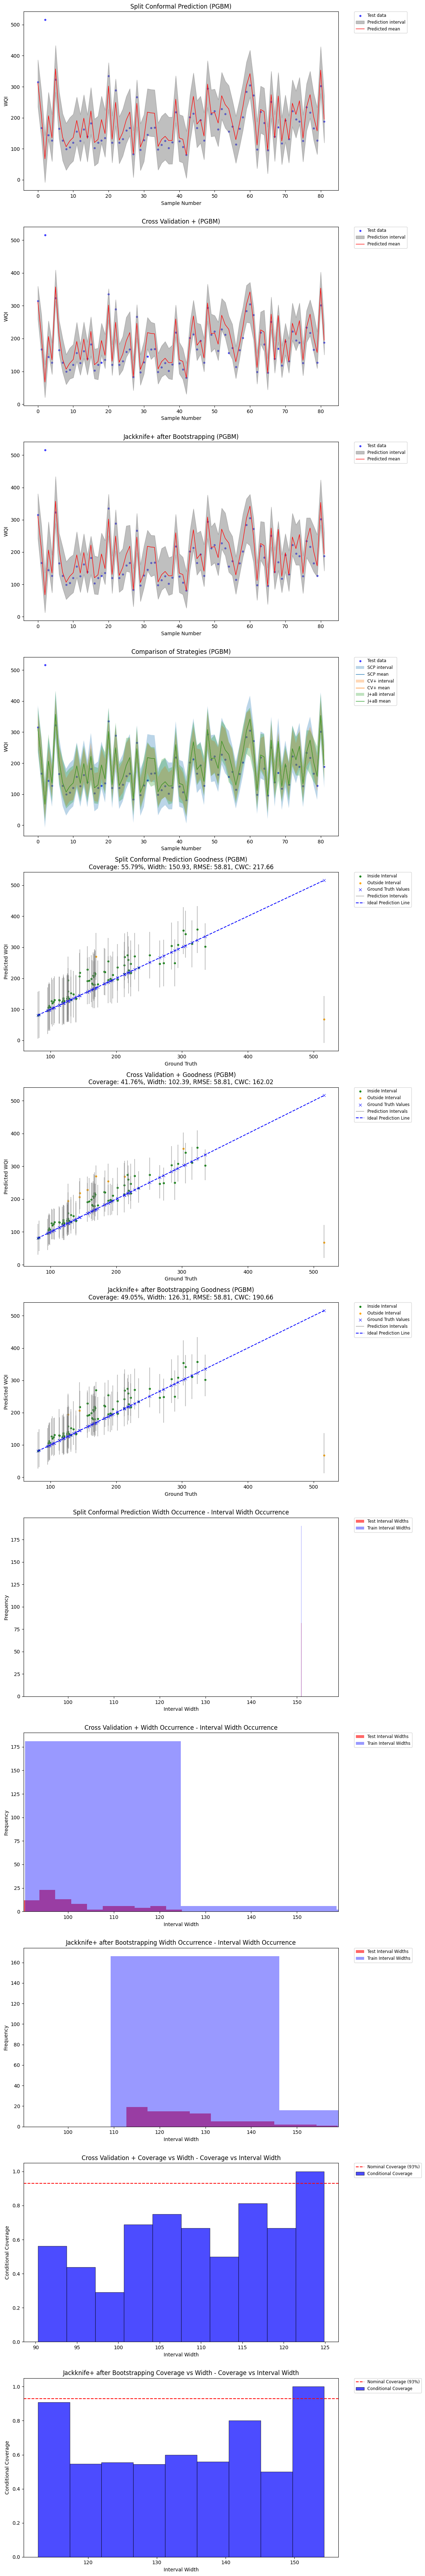

In [ ]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax



def conformal_predictions_MAPIE_PGBM(
    model_class,
    best_params,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    excel_file_path
):
    SEED = 123
    np.random.seed(SEED)
    MISCOVERAGE = 0.07
    warnings.filterwarnings("ignore")
    os.makedirs('output/regression', exist_ok=True)

    # Convert y_test to a NumPy array if it has to_numpy
    y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

    # Map method names to descriptive labels
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }

    # Corresponding parameters for each strategy
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Create a base estimator object for each strategy
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    # Fit & predict using MapieRegressor for each strategy
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set


    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred)
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the intervals and predictions for each strategy
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names)*3 + 1 + len(_strategies)
    fig, axs = plt.subplots(nrows=n_figs, figsize=(12, 6 * n_figs))
    plot_index = 0

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                            color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red',
                                    label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('WQI')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Comparison subplot (moved after individual strategy plots)
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                        alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name],
                                label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('WQI')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1


    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted WQI')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1


    fig.tight_layout()

    # Save plots to Excel
    # Save plots to Excel
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        sheet_name = 'conformal_predictions_MAPIE'
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        #NEW: Save all predictions/intervals to one worksheet
        all_rows = []
        # Always use y_test_np for consistent array-ness
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = ((y_test_np >= ymin_np) & (y_test_np <= ymax_np)).astype(int)
            residual_np = y_test_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_test_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np,
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet2 = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet2.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet2.cell(row=i+2, column=j, value=float(value) if isinstance(value, np.generic) else value)

        # Save the workbook
        workbook.save(excel_file_path)



# Example call (assuming best_params, X_train, y_train, X_test, y_test are defined elsewhere)
conformal_predictions_MAPIE_PGBM(
    model_class=PGBMWrapper,
    best_params=best_params,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    model_name="PGBM",
    excel_file_path="./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/PGBM.xlsx"
)

In [ ]:
def conformal_predictions_PUNCC_PGBM(
    X_train,
    y_train,
    X_test,
    y_test,
    best_scores_autosampler,
    model_class,
    excel_file_path=None,
    model_params=None,
    alpha=0.1
):
    if model_params is None:
        if model_class.__name__ == 'PGBMWrapper':
            model_params = get_best_model_params(best_scores_autosampler, 'PGBM')
        else:
            model_params = {}

    # Initialize model
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    # Convert to NumPy arrays if needed
    y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    model.fit(X_train, y_train_np)

    y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

    def evaluate_cp(X_test_eval, y_test_eval, model_cp, alpha_val):
        X_test_np = X_test_eval.to_numpy() if isinstance(X_test_eval, pd.DataFrame) else np.array(X_test_eval)
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test_np, alpha=alpha_val)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test_eval, y_pred_lower, y_pred_upper)
        return y_pred, y_pred_lower, y_pred_upper, sharpness, coverage

    # Base predictor setup
    base_predictor = BasePredictor(model, is_trained=True)

    # SplitCP
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train_np, fit_ratio=0.5)

    y_pred_sc, y_lower_sc, y_upper_sc, sharpness_sc, coverage_sc = evaluate_cp(X_test, y_test_np, splitcp, alpha)

    # CVPlus
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train_np)
    y_pred, y_lower_cv, y_upper_cv, sharpness_cv, coverage_cv = evaluate_cp(X_test, y_test_np, cvplus, alpha)

    # CQR
    X_fit, X_calib, y_fit, y_calib = train_test_split(X_train, y_train_np, test_size=0.5, random_state=0)
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)
    upper_quantile_model.fit(X_fit, y_fit)
    lower_quantile_model.fit(X_fit, y_fit)
    dualpredictor = DualPredictor([lower_quantile_model, upper_quantile_model], is_trained=[True, True])
    cqr = CQR(dualpredictor, train=False)
    cqr.fit(X_calib=X_calib, y_calib=y_calib)
    y_pred_cqr, y_lower_cqr, y_upper_cqr, sharpness_cqr, coverage_cqr = evaluate_cp(X_test, y_test_np, cqr, alpha)
    y_pred_cqr = 0.5 * (y_lower_cqr + y_upper_cqr)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness_sc:.3f}")
    print(f"SplitCP - Average coverage: {coverage_sc*100:.3f}%")
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cv:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cv*100:.3f}%")
    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")


    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    sample_indices = np.arange(len(y_test_np))

    # Plot results for each method
    for idx, (y_pred, y_lower, y_upper, title) in enumerate([
        (y_pred_sc, y_lower_sc, y_upper_sc, 'SplitCP'),
        (y_pred_sc, y_lower_cv, y_upper_cv, 'CVPlus'),
        (y_pred_cqr, y_lower_cqr, y_upper_cqr, 'CQR')
    ]):
        axs[idx].scatter(sample_indices, y_test_np, label='True', color='blue', s=10, alpha=0.7)
        axs[idx].fill_between(sample_indices, y_lower, y_upper, color='gray', alpha=0.5, label='Prediction interval')
        axs[idx].plot(sample_indices, y_pred, color='red', label='Predicted mean', linewidth=1)
        axs[idx].set_title(f'{title}: Prediction Intervals with Conformal Prediction')
        axs[idx].set_xlabel('Sample Number')
        axs[idx].set_ylabel('WQI')
        axs[idx].legend(fontsize='small')

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_sc).reshape(-1),
        'SplitCP_lower': np.asarray(y_lower_sc).reshape(-1),
        'SplitCP_upper': np.asarray(y_upper_sc).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_sc).reshape(-1),
        'CVPlus_lower': np.asarray(y_lower_cv).reshape(-1),
        'CVPlus_upper': np.asarray(y_upper_cv).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_upper_cqr).reshape(-1),
    }

    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

# Example usage (assuming X_train, y_train, X_test, y_test, best_scores_autosampler exist):
conformal_predictions_PUNCC_PGBM(
    X_train, y_train,
    X_test, y_test,
    best_scores_autosampler=best_scores_autosampler,
    model_class=PGBMWrapper,
    excel_file_path="./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/PGBM.xlsx",
    alpha=0.1
)


Training on CPU
Estimator 0/500, Train metric: 75.3859
Estimator 1/500, Train metric: 68.6061
Estimator 2/500, Train metric: 62.5382
Estimator 3/500, Train metric: 57.5813
Estimator 4/500, Train metric: 53.0865
Estimator 5/500, Train metric: 48.9136
Estimator 6/500, Train metric: 45.1505
Estimator 7/500, Train metric: 42.7811
Estimator 8/500, Train metric: 40.5681
Estimator 9/500, Train metric: 38.3200
Estimator 10/500, Train metric: 36.0123
Estimator 11/500, Train metric: 33.4947
Estimator 12/500, Train metric: 31.4008
Estimator 13/500, Train metric: 29.6435
Estimator 14/500, Train metric: 27.8629
Estimator 15/500, Train metric: 25.9768
Estimator 16/500, Train metric: 24.9108
Estimator 17/500, Train metric: 23.8302
Estimator 18/500, Train metric: 23.0561
Estimator 19/500, Train metric: 21.9436
Estimator 20/500, Train metric: 20.9398
Estimator 21/500, Train metric: 19.9707
Estimator 22/500, Train metric: 19.0122
Estimator 23/500, Train metric: 18.2646
Estimator 24/500, Train metric: 17

In [ ]:
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, PGBMWrapper, best_params,"./drive/MyDrive/WATER QUALITY/WQI_uncertainity/WQI_ml/Conformal_Predictions/PGBM.xlsx", "PGBM Prediction Intervals")

Training on CPU
Estimator 0/100, Train metric: 74.6538
Estimator 1/100, Train metric: 68.0449
Estimator 2/100, Train metric: 62.0746
Estimator 3/100, Train metric: 56.6785
Estimator 4/100, Train metric: 51.7695
Estimator 5/100, Train metric: 47.3005
Estimator 6/100, Train metric: 43.2625
Estimator 7/100, Train metric: 39.5889
Estimator 8/100, Train metric: 36.2535
Estimator 9/100, Train metric: 33.2076
Estimator 10/100, Train metric: 30.4543
Estimator 11/100, Train metric: 27.9543
Estimator 12/100, Train metric: 25.6851
Estimator 13/100, Train metric: 23.6158
Estimator 14/100, Train metric: 21.7343
Estimator 15/100, Train metric: 19.9846
Estimator 16/100, Train metric: 18.4055
Estimator 17/100, Train metric: 16.9718
Estimator 18/100, Train metric: 15.6537
Estimator 19/100, Train metric: 14.4525
Estimator 20/100, Train metric: 13.3620
Estimator 21/100, Train metric: 12.3512
Estimator 22/100, Train metric: 11.4312
Estimator 23/100, Train metric: 10.5813
Estimator 24/100, Train metric: 9.